In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No":0})

In [9]:
df["Churn"].value_counts(normalize = True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [10]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()

Churn,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [11]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
0    61.307408
1    74.441332
Name: MonthlyCharges, dtype: float64

In [12]:
df.groupby(["Contract", "Churn"])["MonthlyCharges"].mean().unstack()

Churn,0,1
Contract,,
Month-to-month,61.462635,73.019396
One year,62.540926,85.050904
Two year,60.112798,86.777083


In [13]:
df.groupby("Churn")["tenure"].mean()

Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

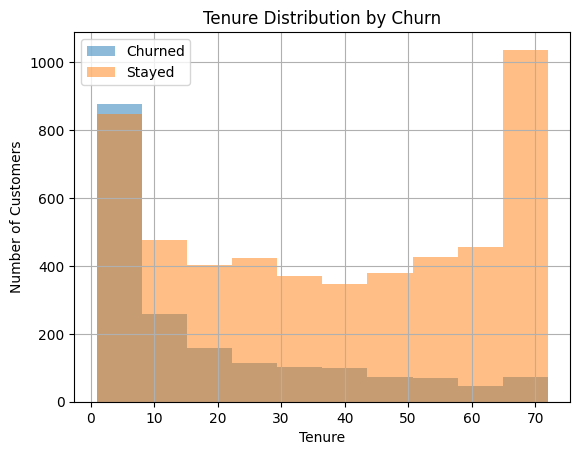

In [14]:
import matplotlib.pyplot as plt

df[df["Churn"] == 1]["tenure"].hist(alpha = 0.5, label = "Churned")
df[df["Churn"] == 0]["tenure"].hist(alpha = 0.5, label = "Stayed")

plt.legend()
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.show()

In [15]:
df.groupby(["Contract", "Churn"])["tenure"].mean().unstack()

Churn,0,1
Contract,,
Month-to-month,21.033333,14.016918
One year,41.705972,44.963855
Two year,56.948687,61.270833


In [16]:
df.groupby("InternetService")["Churn"].mean()

InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64

In [17]:
df.groupby(["InternetService", "Churn"])["TotalCharges"].mean().unstack()

Churn,0,1
InternetService,,
DSL,2433.006822,784.349673
Fiber optic,4135.834074,1914.616384
No,704.678003,173.919912


In [18]:
df.groupby(["InternetService", "Churn"])["MonthlyCharges"].mean().unstack()

Churn,0,1
InternetService,,
DSL,60.200026,49.083224
Fiber optic,93.932379,88.126484
No,21.133156,20.368142


In [19]:
df.groupby("TechSupport")["Churn"].mean()

TechSupport
No                     0.416475
No internet service    0.074342
Yes                    0.151961
Name: Churn, dtype: float64

In [20]:
df.groupby("OnlineSecurity")["Churn"].mean()

OnlineSecurity
No                     0.417787
No internet service    0.074342
Yes                    0.146402
Name: Churn, dtype: float64

In [21]:
df.groupby(["Contract", "InternetService", "TechSupport"])["Churn"].mean().sort_values(ascending = False).head(10)

Contract        InternetService  TechSupport        
Month-to-month  Fiber optic      No                     0.575167
                                 Yes                    0.388554
                DSL              No                     0.358597
                                 Yes                    0.227139
One year        Fiber optic      Yes                    0.203540
Month-to-month  No               No internet service    0.188931
One year        Fiber optic      No                     0.185304
                DSL              No                     0.098361
                                 Yes                    0.088957
Two year        Fiber optic      No                     0.082645
Name: Churn, dtype: float64

In [22]:
high_risk = df[
    (df["Contract"] == "Month-to-month") &
    (df["InternetService"] == "Fiber optic") &
    (df["TechSupport"] == "No") 
]

high_risk["Churn"].mean()

np.float64(0.5751670378619154)

In [23]:
segment_size = len(high_risk) / len(df)

In [24]:
df[
(df["InternetService"] == "Fiber optic")].groupby("TechSupport")["Churn"].mean()


TechSupport
No     0.493722
Yes    0.226328
Name: Churn, dtype: float64

In [25]:
len(df[
    (df["InternetService"] == "Fiber optic") &
    (df["TechSupport"] == "No")
]) / len(df) 

0.3171217292377702

In [26]:
overall_churn = df["Churn"].mean()
overall_churn

np.float64(0.26578498293515357)

In [27]:
segment_size

0.2554038680318544

In [28]:
segment_churn = high_risk["Churn"].mean()
segment_churn

np.float64(0.5751670378619154)

In [29]:
segment_contribution = segment_size * segment_churn
segment_contribution

np.float64(0.14689988623435724)

In [30]:
new_segment_churn = segment_churn - 0.10
new_contribution = segment_size * new_segment_churn
new_contribution 

np.float64(0.12135949943117179)

In [31]:
churn_reduction = segment_contribution - new_contribution
churn_reduction

np.float64(0.025540386803185447)

In [32]:
new_overall_churn = overall_churn - churn_reduction
new_overall_churn

np.float64(0.24024459613196814)

In [33]:
df.to_csv("../data/cleaned/telco_churn_cleaned.csv", index = False)